# Patent Value Indicators: Molten Salt Energy Storage 
This notebook will show how the data is handled and how the composite value indicator is made

In [1]:
# This cel imports the needed modules/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This is cel extracts the data from the excel file into a dataframe
patent_all_data_df = pd.read_excel('database_indicators.xlsx')

In [3]:
# Setting the big data df into a smaller one
patent_df = patent_all_data_df[['PN','FC']].copy()
patent_df.rename(columns = {'PN':'Patent Number(s)','FC':'Forward citations'}, inplace = True)
patent_df

,Patent Number(s),Forward citations
0,US2022228574-A1,0
1,US2019390660-A1; WO2019246369-A1; CA3104270-...,1
2,US2021180574-A1; US11225951-B2,0
3,US2016019993-A1; US9564251-B2,0
4,US10106753-B1,1
...,...,...
669,WO2017119671-A1; KR2017083488-A; IN201847029...,4
670,WO2017047521-A1; JP6152924-B1; TW201711959-A...,8
671,WO2021099538-A1; BE1027795-B1; TW202130824-A...,0
672,CA1264041-A; US4924897-A,5


In [4]:
# Calculating both the FC-score (Forward Citation score) and PF-score (Patent Family score)
temporary_PF_df = (patent_df['Patent Number(s)'].str.count(';')+1)
patent_df['PF score'] = temporary_PF_df/temporary_PF_df.max()
patent_df['FC score'] = patent_df[['Forward citations']]/patent_df['Forward citations'].max()

## Difference between indicators

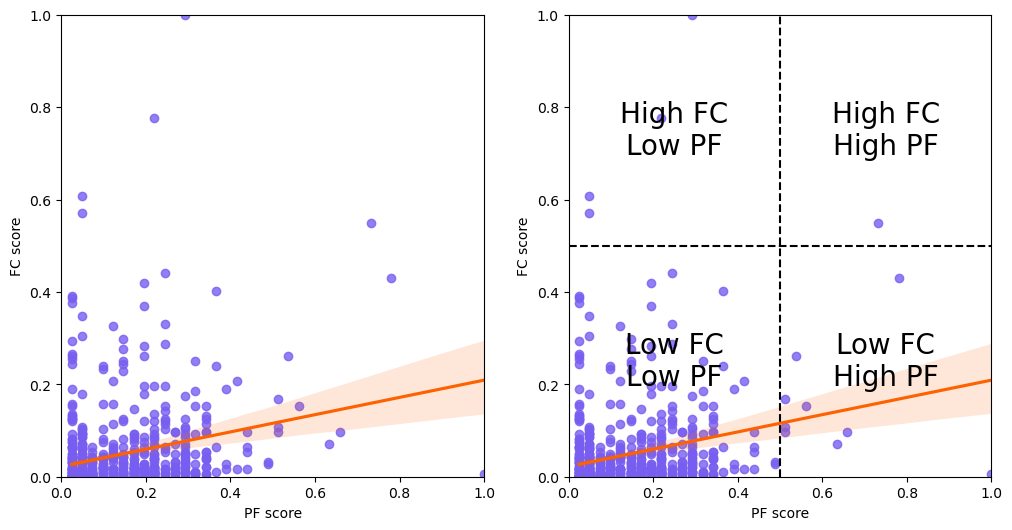

In [5]:
# setting a colorblind friendly palette
sns.set_palette(['#785EF0','#FE6100','#DC267F','#FFB000','#648FFF'])

fig1, axes1 = plt.subplots(1,2, sharex=True, figsize=(12,6))

sns.regplot(x=patent_df['PF score'],y=patent_df['FC score'],order=1,line_kws={"color": "C1"},ax=axes1[0]);
axes1[0].set_xlim([0,1])
axes1[0].set_ylim([0,1])
sns.regplot(x=patent_df['PF score'],y=patent_df['FC score'],order=1,line_kws={"color": "C1"},ax=axes1[1]);
axes1[1].set_xlim([0,1])
axes1[1].set_ylim([0,1])
axes1[1].axhline(0.5, linestyle='--',color= "#000000")
axes1[1].axvline(0.5, linestyle='--',color= "#000000")
#axes1[1].set_title("Correlation between indicator scores",y=1,fontweight="bold",fontsize=14)
axes1[1].annotate('High FC\nLow PF',xy=(0.25,0.75),fontsize=20,horizontalalignment='center', verticalalignment='center')
axes1[1].annotate('Low FC\nHigh PF',xy=(0.75,0.25),fontsize=20,horizontalalignment='center', verticalalignment='center')
axes1[1].annotate('High FC\nHigh PF',xy=(0.75,0.75),fontsize=20,horizontalalignment='center', verticalalignment='center')
axes1[1].annotate('Low FC\nLow PF',xy=(0.25,0.25),fontsize=20,horizontalalignment='center', verticalalignment='center')

fig1.savefig('correlation value indicators.png', dpi=432);

## Making the composite indicators

In [6]:
# Calculating the total composite value indicators

# The equal sum indicator 
PF_factor = 0.5
FC_factor = 0.5

patent_df['FC-PF score EQUAL SUM'] = PF_factor*patent_df['PF score'] + FC_factor*patent_df['FC score']

# The multiplication indicator
patent_df['FC-PF score MULTIPLICATION'] = patent_df['PF score']*patent_df['FC score']

# The weighted sum indicator in favor of PF
PF_factor = 0.6
FC_factor = 0.4

patent_df['FC-PF score PF WEIGHTED SUM'] = PF_factor*patent_df['PF score'] + FC_factor*patent_df['FC score']

# The weighted sum indicator in favor of FC
PF_factor = 0.4
FC_factor = 0.6

patent_df['FC-PF score FC WEIGHTED SUM'] = PF_factor*patent_df['PF score'] + FC_factor*patent_df['FC score']

# Making a pythagorean theorum based composite
patent_df['FC-PF score PYTHAGORAS'] = np.sqrt(patent_df['PF score']**2 + patent_df['FC score']**2)

In [7]:
# Sorting dataframe based on multiplication indicator
sorted_patent_df = patent_df.sort_values(by='FC-PF score EQUAL SUM', ascending=False).reset_index(drop=True)
sorted_patent_df.head(10)

,Patent Number(s),Forward citations,PF score,FC score,FC-PF score EQUAL SUM,FC-PF score MULTIPLICATION,FC-PF score PF WEIGHTED SUM,FC-PF score FC WEIGHTED SUM,FC-PF score PYTHAGORAS
0,DE3338009-A; GB2142135-A; US4504402-A; US45...,184,0.292683,1.000000,0.646341,0.292683,0.575610,0.717073,1.041952
1,WO2010045097-A1; US2010101783-A1; US20101017...,101,0.731707,0.548913,0.640310,0.401644,0.658590,0.622031,0.914714
2,WO2011058383-A2; WO2011058383-A3; US20122279...,79,0.780488,0.429348,0.604918,0.335101,0.640032,0.569804,0.890787
3,US2017316840-A1; WO2017192463-A2; WO20171924...,1,1.000000,0.005435,0.502717,0.005435,0.602174,0.403261,1.000015
4,EP116809-A; AU8424666-A; JP59166642-A; BR84...,143,0.219512,0.777174,0.498343,0.170599,0.442577,0.554109,0.807580
5,WO2009105643-A2; US2009211726-A1; KR20101166...,48,0.536585,0.260870,0.398727,0.139979,0.426299,0.371156,0.596638
6,EP412021-A; JP3066786-A; JP3066787-A; JP306...,74,0.365854,0.402174,0.384014,0.147137,0.380382,0.387646,0.543684
7,EP1462238-A2; JP2004285306-A; CA2461621-A1; ...,18,0.658537,0.097826,0.378181,0.064422,0.434252,0.322110,0.665763
8,GB2508537-A; WO2014128457-A1; GB2508537-B; ...,28,0.560976,0.152174,0.356575,0.085366,0.397455,0.315695,0.581249
9,GB2518529-A; DE102014218983-A1; FR3011134-A1...,13,0.634146,0.070652,0.352399,0.044804,0.408749,0.296050,0.638070


In [8]:
# For ease of comparison in a plot the scores are normalised to be in the range [0,1]
sorted_patent_df['FC-PF score MULTIPLICATION'] = sorted_patent_df['FC-PF score MULTIPLICATION']/sorted_patent_df['FC-PF score MULTIPLICATION'].max()
sorted_patent_df['FC-PF score EQUAL SUM'] = sorted_patent_df['FC-PF score EQUAL SUM']/sorted_patent_df['FC-PF score EQUAL SUM'].max()
sorted_patent_df['FC-PF score PF WEIGHTED SUM'] = sorted_patent_df['FC-PF score PF WEIGHTED SUM']/sorted_patent_df['FC-PF score PF WEIGHTED SUM'].max()
sorted_patent_df['FC-PF score FC WEIGHTED SUM'] = sorted_patent_df['FC-PF score FC WEIGHTED SUM']/sorted_patent_df['FC-PF score FC WEIGHTED SUM'].max()
sorted_patent_df['FC-PF score PYTHAGORAS'] = sorted_patent_df['FC-PF score PYTHAGORAS']/sorted_patent_df['FC-PF score PYTHAGORAS'].max()
sorted_patent_df.head(10)

,Patent Number(s),Forward citations,PF score,FC score,FC-PF score EQUAL SUM,FC-PF score MULTIPLICATION,FC-PF score PF WEIGHTED SUM,FC-PF score FC WEIGHTED SUM,FC-PF score PYTHAGORAS
0,DE3338009-A; GB2142135-A; US4504402-A; US45...,184,0.292683,1.000000,1.000000,0.728713,0.874004,1.000000,1.000000
1,WO2010045097-A1; US2010101783-A1; US20101017...,101,0.731707,0.548913,0.990669,1.000000,1.000000,0.867458,0.877885
2,WO2011058383-A2; WO2011058383-A3; US20122279...,79,0.780488,0.429348,0.935911,0.834323,0.971822,0.794624,0.854921
3,US2017316840-A1; WO2017192463-A2; WO20171924...,1,1.000000,0.005435,0.777789,0.013531,0.914339,0.562371,0.959752
4,EP116809-A; AU8424666-A; JP59166642-A; BR84...,143,0.219512,0.777174,0.771021,0.424752,0.672007,0.772737,0.775064
5,WO2009105643-A2; US2009211726-A1; KR20101166...,48,0.536585,0.260870,0.616899,0.348515,0.647291,0.517598,0.572616
6,EP412021-A; JP3066786-A; JP3066787-A; JP306...,74,0.365854,0.402174,0.594135,0.366337,0.577570,0.540594,0.521794
7,EP1462238-A2; JP2004285306-A; CA2461621-A1; ...,18,0.658537,0.097826,0.585111,0.160396,0.659367,0.449201,0.638958
8,GB2508537-A; WO2014128457-A1; GB2508537-B; ...,28,0.560976,0.152174,0.551682,0.212541,0.603494,0.440254,0.557847
9,GB2518529-A; DE102014218983-A1; FR3011134-A1...,13,0.634146,0.070652,0.545221,0.111551,0.620642,0.412859,0.612380


## Comparing composite value indicators

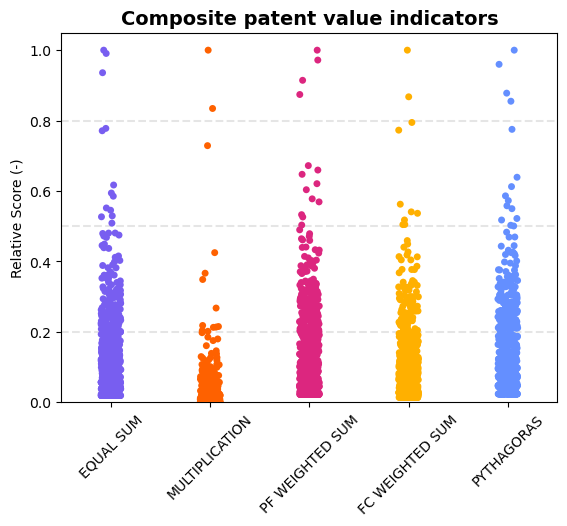

In [9]:
# Making a overview of the comparison of the different composite indicators
fig2, axes2 = plt.subplots(1,1)

sns.stripplot(data=sorted_patent_df[['FC-PF score EQUAL SUM','FC-PF score MULTIPLICATION','FC-PF score PF WEIGHTED SUM','FC-PF score FC WEIGHTED SUM','FC-PF score PYTHAGORAS']],ax=axes2)
axes2.set_xticks(ticks=[0,1,2,3,4],labels=['EQUAL SUM','MULTIPLICATION','PF WEIGHTED SUM','FC WEIGHTED SUM','PYTHAGORAS'],rotation=45)
axes2.set_ylabel('Relative Score (-)')
axes2.set_ylim([0,1.05])
axes2.axhline(0.5, linestyle='--',color= "#000000",alpha=0.1)
axes2.axhline(0.2, linestyle='--',color= "#000000",alpha=0.1)
axes2.axhline(0.8, linestyle='--',color= "#000000",alpha=0.1)
plt.title('Composite patent value indicators',y=1,fontweight="bold",fontsize=14)

# Exporting figure
fig2.savefig('comparison composite value indicators.png', dpi=432, bbox_inches='tight');